In [1]:
#import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
plt.rcParams['figure.figsize']= (12,6)
sns.set_style('darkgrid')

In [2]:
#read the data
motorcycle_sales = pd.read_csv('sales_data.csv', parse_dates=['date'])
motorcycle_sales.head(10)

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card
5,2021-06-01,North,Wholesale,Suspension & traction,40,37.37,1494.80,Transfer
6,2021-06-01,West,Retail,Electrical system,2,27.20,54.41,Credit card
7,2021-06-01,Central,Retail,Breaking system,10,22.44,224.38,Credit card
8,2021-06-01,West,Wholesale,Frame & body,40,39.50,1579.87,Transfer
9,2021-06-01,North,Retail,Frame & body,6,45.44,272.61,Credit card


### UNDERSTANDING THE DATA

In [3]:
motorcycle_sales.shape

(1000, 8)

In [4]:
motorcycle_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


In [5]:
#checking the unique values in the categorical columns

motorcycle_sales['client_type'].unique()

array(['Retail', 'Wholesale'], dtype=object)

In [6]:
motorcycle_sales['warehouse'].unique()

array(['Central', 'North', 'West'], dtype=object)

In [7]:
motorcycle_sales['product_line'].unique()

array(['Miscellaneous', 'Breaking system', 'Suspension & traction',
       'Frame & body', 'Engine', 'Electrical system'], dtype=object)

In [8]:
motorcycle_sales['payment'].unique()

array(['Credit card', 'Cash', 'Transfer'], dtype=object)

##### OBSERVATIONS
1. The dataset contains sales data from June to August 2021.
2. The company have two client types; Retailers and Wholesalers.
3. The company operates three warehouse; Central, North, West.
4. The products purchased are grouped into 6 product lines.
5. The company accepts 3 payment methods; Credit card, Cash and Transfer.


### Checking For Null Values

In [9]:
motorcycle_sales.isnull().sum()

date            0
warehouse       0
client_type     0
product_line    0
quantity        0
unit_price      0
total           0
payment         0
dtype: int64

##### OBSERVATION: There are no null values in the dataset.

### Checking for Duplicate in the dataset

In [10]:
duplicated = motorcycle_sales[motorcycle_sales.duplicated()]
print(f'Duplicate values are :{len(duplicated)}')

Duplicate values are :0


##### OBSERVATION: There is no dulpicate in the dataset.

### DATA VISUALIZATION:OBJECTIVES

1. Discover the following:
    - Total sales for each payment method.
    - Average unit price for each product line.
    - Average purchase value by client type.
    - Total purchase value by product line.
2. Investigate trends and relationships.

### Total Sales for each Payment Method

In [11]:
sales_per_payment = motorcycle_sales.groupby('payment').total.agg([sum]).reset_index()
sales_per_payment

,payment,sum
0,Cash,19199.10
1,Credit card,110271.57
2,Transfer,159642.33


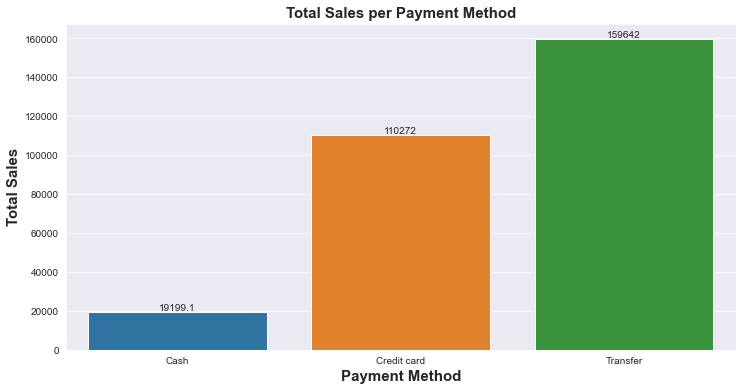

In [12]:
pm= sns.barplot(x='payment',y='sum',data=sales_per_payment,errwidth=0)
plt.title('Total Sales per Payment Method', fontweight='bold',fontsize=15)
plt.xlabel('Payment Method',fontweight='bold',fontsize=15)
plt.ylabel('Total Sales',fontweight='bold',fontsize=15)
for i in pm.containers:
    pm.bar_label(i)

#### OBSERVATION: Most of the sales were made through Transfer.

In [13]:
tc = motorcycle_sales.groupby(['payment','client_type']).total.agg([sum]).reset_index()
tc

,payment,client_type,sum
0,Cash,Retail,19199.10
1,Credit card,Retail,110271.57
2,Transfer,Wholesale,159642.33


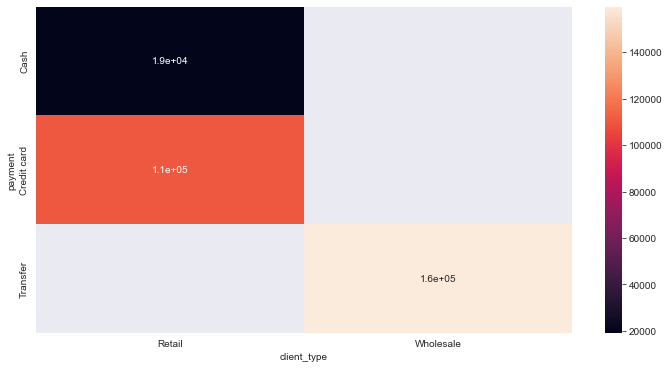

In [14]:
tc_df = tc.pivot('payment','client_type','sum')
sns.heatmap(tc_df,annot=True);

#### OBSERVATION: Wholesalers only paid through Transfer.

### Average Unit Price for each Product Line

In [15]:
price_per_product = motorcycle_sales.groupby('product_line').unit_price.mean().reset_index()
price_per_product

,product_line,unit_price
0,Breaking system,17.740522
1,Electrical system,25.585130
2,Engine,60.091803
3,Frame & body,42.832229
4,Miscellaneous,22.810738
5,Suspension & traction,33.969868


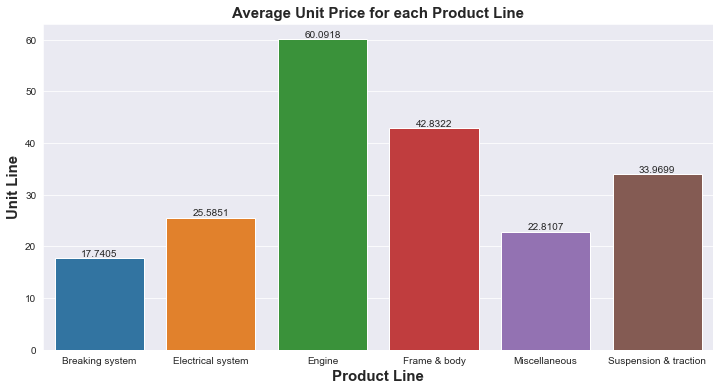

In [16]:
um= sns.barplot(x='product_line',y='unit_price',data=price_per_product,errwidth=0)
plt.title('Average Unit Price for each Product Line', fontweight='bold',fontsize=15)
plt.xlabel('Product Line',fontweight='bold',fontsize=15)
plt.ylabel('Unit Line',fontweight='bold',fontsize=15)
for i in um.containers:
    um.bar_label(i)

#### OBSERVATIONS: Average unit price for the Engine product line is the highest, while the Breaking System product line has the least average unit price.

### Average Purchase Value per Client Type

In [17]:
sales_per_client = motorcycle_sales.groupby('client_type').total.mean().reset_index()
sales_per_client

,client_type,total
0,Retail,167.058929
1,Wholesale,709.521467


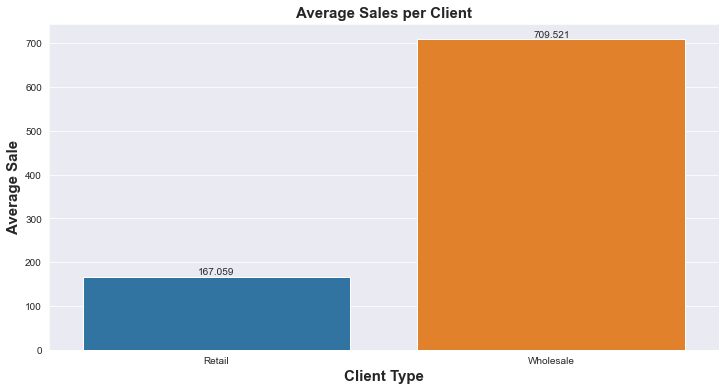

In [18]:
am= sns.barplot(x='client_type',y='total',data=sales_per_client,errwidth=0)
plt.title('Average Sales per Client', fontweight='bold',fontsize=15)
plt.xlabel('Client Type',fontweight='bold',fontsize=15)
plt.ylabel('Average Sale',fontweight='bold',fontsize=15)
for i in am.containers:
    am.bar_label(i)

#### OBSERVATION: The wholesalers made more average purchase.

### Total Purchase Value By Product Line

In [19]:
purchase_per_product = motorcycle_sales.groupby('product_line').total.agg([sum]).reset_index()
purchase_per_product

,product_line,sum
0,Breaking system,38350.15
1,Electrical system,43612.71
2,Engine,37945.38
3,Frame & body,69024.73
4,Miscellaneous,27165.82
5,Suspension & traction,73014.21


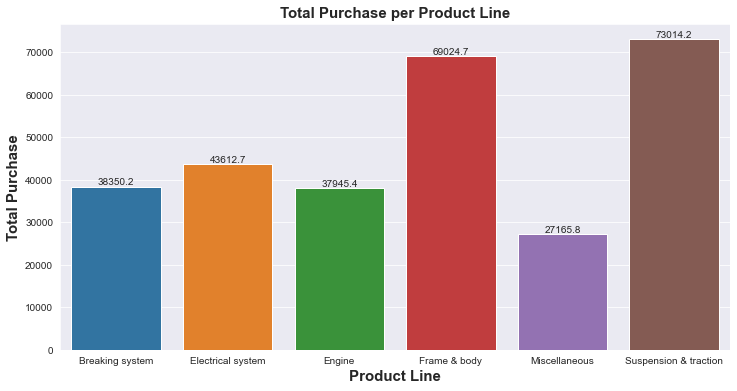

In [20]:
lm= sns.barplot(x='product_line',y='sum',data=purchase_per_product,errwidth=0)
plt.title('Total Purchase per Product Line', fontweight='bold',fontsize=15)
plt.xlabel('Product Line',fontweight='bold',fontsize=15)
plt.ylabel('Total Purchase',fontweight='bold',fontsize=15)
for i in lm.containers:
    lm.bar_label(i)

#### OBSERVATION: Products under the Suspension & traction product line were purchased more, while the Miscellaneous products were purchased the least.

### Total Quantity Ordered By Product Line

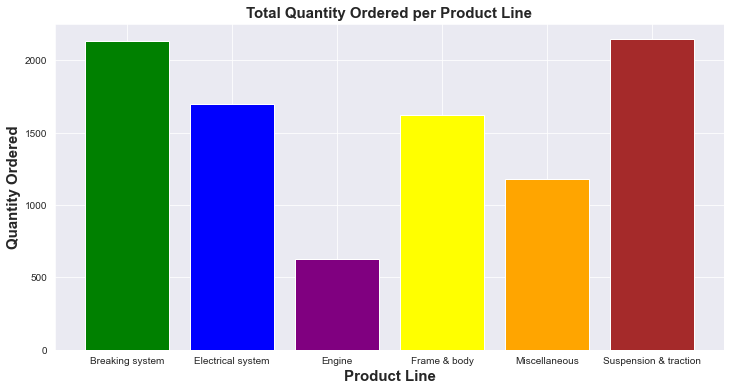

In [21]:
my_colors =['green','blue','purple','yellow','orange','brown']
products = motorcycle_sales.groupby('product_line')
total_purchase = products.sum()['quantity']
a_products = [product_line for product_line, df in products]

plt.bar(a_products,total_purchase,color=my_colors)
plt.title ('Total Quantity Ordered per Product Line', fontsize=15,fontweight='bold')
plt.ylabel('Quantity Ordered',fontweight='bold', fontsize=15)
plt.xlabel('Product Line', fontweight='bold', fontsize=15)
plt.show()

##### Products under the Breaking sysytem were ordered the most, could the price have been a determining factor?
##### Testing to see the relationship between price and quantity ordered.

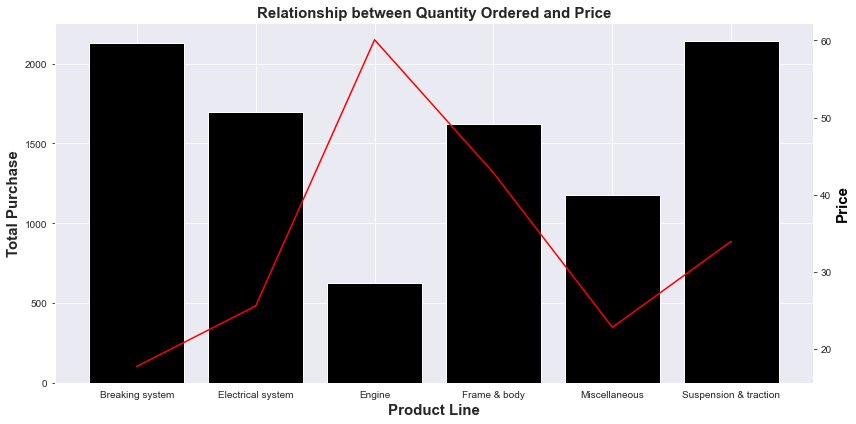

In [22]:
price = motorcycle_sales.groupby('product_line').mean()['unit_price']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(a_products, total_purchase, color='black')
ax2.plot(a_products, price, color ='red')
ax1.set_xlabel('Product Line', fontweight='bold', fontsize=15)
ax1.set_ylabel('Total Purchase', fontweight='bold', fontsize=15)
ax2.set_ylabel('Price', fontweight='bold', fontsize=15, color = 'black')
plt.title('Relationship between Quantity Ordered and Price',fontweight='bold', fontsize=15)
plt.grid(False)
plt.tight_layout()
plt.show()

#### OBSERVATION: Price was a detremining factor to some extent, but there are other factors that affected the quantity ordered.

### Total Sales per Warehouse

In [23]:
w_sales = motorcycle_sales.groupby('warehouse').total.agg([sum]).reset_index()
w_sales


,warehouse,sum
0,Central,141982.88
1,North,100203.63
2,West,46926.49


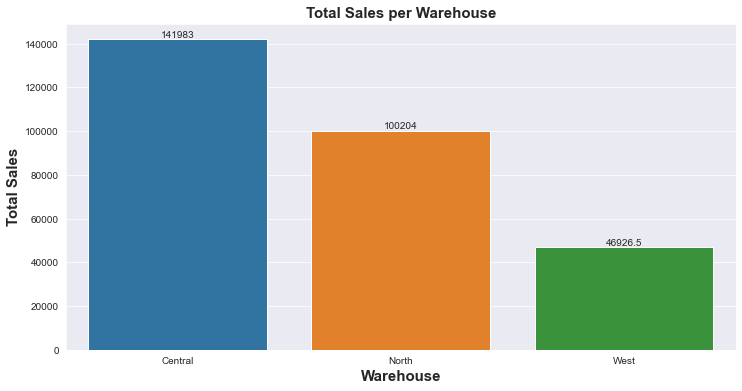

In [24]:
km= sns.barplot(x='warehouse',y='sum',data=w_sales,errwidth=0)
plt.title('Total Sales per Warehouse', fontweight='bold',fontsize=15)
plt.xlabel('Warehouse',fontweight='bold',fontsize=15)
plt.ylabel('Total Sales',fontweight='bold',fontsize=15)
for i in km.containers:
    km.bar_label(i)

#### OBSERVATION: The central warehouse has the highest sale, while the West warehouse recorder the least sale.

### Total Product Line Order per Warehouse

Text(0, 0.5, 'Total Order')

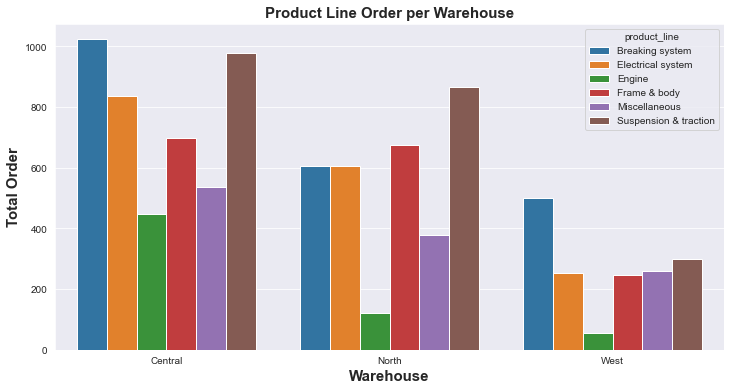

In [44]:
w_ordered = motorcycle_sales.groupby(['warehouse', 'product_line']).quantity.agg([sum]).reset_index()

sns.barplot(x='warehouse',y='sum',hue='product_line',data=w_ordered,errwidth=0)
plt.title('Product Line Order per Warehouse', fontweight='bold',fontsize=15)
plt.xlabel('Warehouse',fontweight='bold',fontsize=15)
plt.ylabel('Total Order',fontweight='bold',fontsize=15)


#### OBSERVATION: In all warehouses the least ordered product line is the Engine product line.

### STUDYING TRENDS IN THE MONTHS

In [27]:
#extract month from date column
#this returned integers
motorcycle_sales['month'] = motorcycle_sales['date'].dt.month
#to get month names
import calendar
motorcycle_sales['month']=motorcycle_sales['month'].apply(lambda x:calendar.month_abbr[x])

In [28]:
#a new column month has been created
motorcycle_sales.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment,month
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card,Jun
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash,Jun
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,Jun
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,Jun
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card,Jun


### Total Sales Per Month

In [29]:

month_sales = motorcycle_sales.groupby('month').total.agg([sum]).reset_index()
month_sales

,month,sum
0,Aug,100245.06
1,Jul,93547.91
2,Jun,95320.03


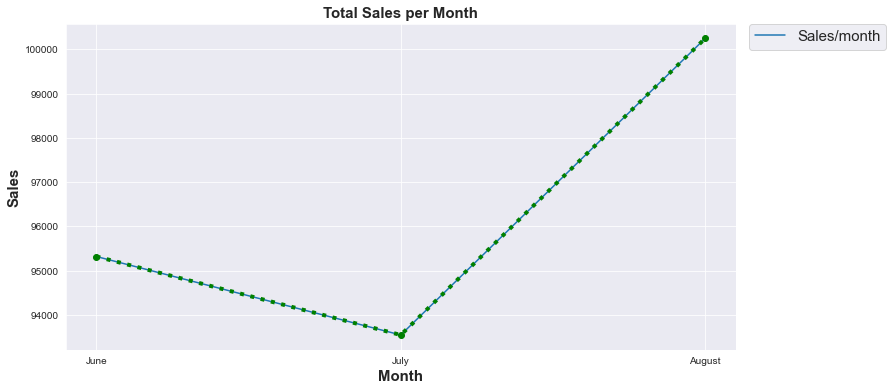

In [30]:
y1=[95320.03,93547.91,100245.06]
x=['June','July','August']
plt.plot(x,y1, label='Sales/month')
plt.xlabel('Month', fontsize=15,fontweight='bold')
plt.ylabel('Sales',fontsize=15,fontweight='bold')
plt.plot(y1, 'o:g', linewidth=4)
plt.legend(bbox_to_anchor=(1.02,1),loc='upper left', borderaxespad= 0, fontsize=15)
plt.title('Total Sales per Month',fontsize=15,fontweight='bold' );



#### OBSERVATION: There was  drop in sales in July and there was an incredible rise in sales in August.

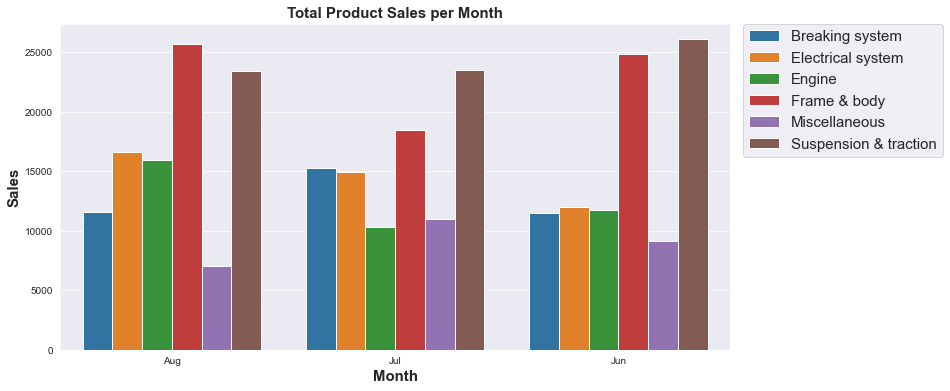

In [31]:
product_month=motorcycle_sales.groupby(['month','product_line']).total.agg([sum]).reset_index()
sns.barplot(x='month',y='sum', hue='product_line',data=product_month)
plt.xlabel('Month', fontsize=15,fontweight='bold')
plt.ylabel('Sales',fontsize=15,fontweight='bold')
plt.legend(bbox_to_anchor=(1.02,1),loc='upper left', borderaxespad= 0, fontsize=15)
plt.title('Total Product Sales per Month',fontsize=15,fontweight='bold' );

### Total Quantity Ordered Per Month

In [32]:
order_month=motorcycle_sales.groupby('month').quantity.agg([sum]).reset_index()
order_month

,month,sum
0,Aug,3191
1,Jul,3160
2,Jun,3044


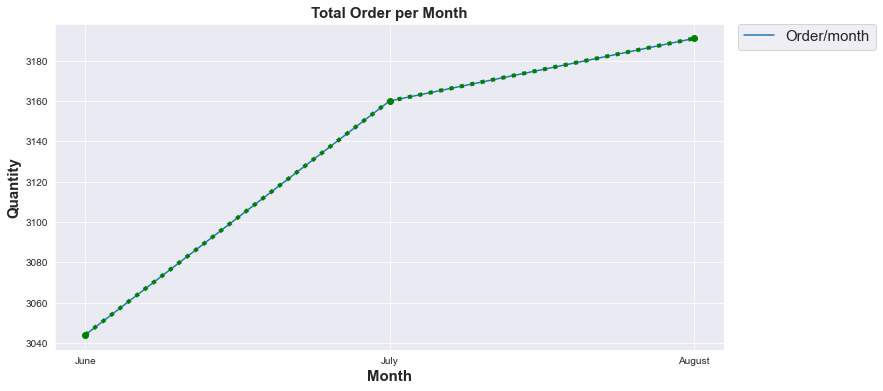

In [33]:
w= [3044, 3160,3191]
x=['June','July','August']
plt.plot(x,w, label='Order/month')
plt.xlabel('Month', fontsize=15,fontweight='bold')
plt.ylabel('Quantity',fontsize=15,fontweight='bold')
plt.plot(w, 'o:g', linewidth=4)
plt.legend(bbox_to_anchor=(1.02,1),loc='upper left', borderaxespad= 0, fontsize=15)
plt.title('Total Order per Month',fontsize=15,fontweight='bold' );

#### OBSERVATION: Quantity ordered increased each month.

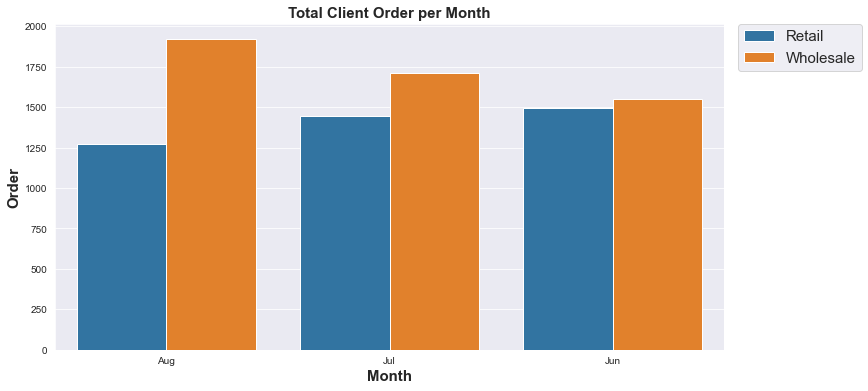

In [34]:
o_month=motorcycle_sales.groupby(['month','client_type']).quantity.agg([sum]).reset_index()

sns.barplot(x='month',y='sum', hue='client_type',data=o_month)
plt.xlabel('Month', fontsize=15,fontweight='bold')
plt.ylabel('Order',fontsize=15,fontweight='bold')
plt.legend(bbox_to_anchor=(1.02,1),loc='upper left', borderaxespad= 0, fontsize=15)
plt.title('Total Client Order per Month',fontsize=15,fontweight='bold' );

### Investigating Relationships

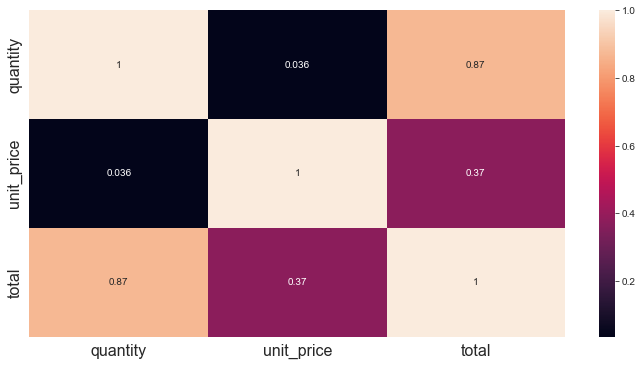

In [35]:
matrix = motorcycle_sales.corr()
sns.heatmap(matrix,annot=True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#### OBSERVATION: 
1. There is a strong positive relationship between sales and quantity. The higher the quantity ordered the higher the sales.
2. Unit price has a very weak positive relationship with quantity i.e price has little or no effect on the quantity sold or ordered.
3. Unit price also has a weak positive relationship with the sales.

### Measuring Correlation Between Numerical and Categorical Variables

#### HYPOTHESIS
#### H(0): The variables are not correlated with each other
#### H(1): The variables are correlated

In [36]:
from scipy.stats import f_oneway

In [37]:
w1=motorcycle_sales.groupby('warehouse')['quantity'].apply(list)
Anova=f_oneway(*w1)
print('P-Value for Anova is:', Anova[1])


w2=motorcycle_sales.groupby('warehouse')['unit_price'].apply(list)
Anova=f_oneway(*w2)
print('P-Value for Anova is:', Anova[1])


w3=motorcycle_sales.groupby('warehouse')['total'].apply(list)
Anova=f_oneway(*w3)
print('P-Value for Anova is:', Anova[1])

P-Value for Anova is: 0.7896866905567806
P-Value for Anova is: 0.7737095063559322
P-Value for Anova is: 0.47551947059515853


In [38]:
c1=motorcycle_sales.groupby('client_type')['quantity'].apply(list)
Anova=f_oneway(*c1)
print('P-Value for Anova is:', Anova[1])

c2=motorcycle_sales.groupby('client_type')['unit_price'].apply(list)
Anova=f_oneway(*c2)
print('P-Value for Anova is:', Anova[1])

c3=motorcycle_sales.groupby('client_type')['total'].apply(list)
Anova=f_oneway(*c3)
print('P-Value for Anova is:', Anova[1])

P-Value for Anova is: 2.154567361725719e-189
P-Value for Anova is: 0.8662906776603085
P-Value for Anova is: 2.493717267909792e-124


In [39]:
p1=motorcycle_sales.groupby('product_line')['quantity'].apply(list)
Anova=f_oneway(*p1)
print('P-Value for Anova is:', Anova[1])

p2=motorcycle_sales.groupby('product_line')['unit_price'].apply(list)
Anova=f_oneway(*p2)
print('P-Value for Anova is:', Anova[1])

p3=motorcycle_sales.groupby('product_line')['total'].apply(list)
Anova=f_oneway(*p3)
print('P-Value for Anova is:', Anova[1])

P-Value for Anova is: 0.9019081290940447
P-Value for Anova is: 0.0
P-Value for Anova is: 5.400084626630576e-26


#### Conclusions: 
1. Product line is correlated with unit price and sales.
2. Client type is correlated with quantity and sales.
3. Warehouse is not correlated with any numerical variable.

### Investigating  Relationship Between Categorical Variables

#### HYPOTHESIS
#### H(0): The variables are independent of each other.
#### H(1): The variables are dependent on each other .

In [40]:
from scipy.stats import chi2_contingency

In [41]:
cross = pd.crosstab(index=motorcycle_sales['warehouse'], columns=motorcycle_sales['product_line'])
chi1 = chi2_contingency(cross)
print('The relationship between warehouse and product line is:', chi1[1])

The relationship between warehouse and product line is: 0.48672323693864494


In [42]:
wc= pd.crosstab(index=motorcycle_sales['warehouse'], columns=motorcycle_sales['client_type'])
chiw = chi2_contingency(wc)
print('The relationship between warehouse and client type is:', chiw[1])

The relationship between warehouse and client type is: 0.9570263252706168


In [43]:
cp = pd.crosstab(index=motorcycle_sales['client_type'], columns=motorcycle_sales['product_line'])
chip = chi2_contingency(cp)
print('The relationship between client type and product line is:', chip[1])

The relationship between client type and product line is: 0.9119369823043413


#### Conclusion: The variables are not correlated with each other i.e they are independent of each other.

### DATA VISUALIZATION: KEY TAKEAWAY
1. Transfer was the most used payment mehod, as all wholesalers paid through transfer.
2. The most profitable warehouse is the Central warehouse: they receive the highest orders and make the highest sales.
3. The wholesalers have more purchasing power.
4. Highest sale was recorded in August with Frame&body product line accounting for most of the sale.
5. Client made the highest order in August, and most of the orders came from the wholesaers.
6. The suspension & traction product line is the most purchased product line.